In [1]:
import pandas as pd
import numpy as np
import pickle
import gzip
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
from keras.utils import np_utils
import math
import matplotlib.pyplot
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


## Model Definition

In [5]:
def get_model(input_size, drop_out, dl_1_nodes, dl_2_nodes, dl_3_nodes, opt = 'adam', loss_func = 'binary_crossentropy'):

    
    model = Sequential()
    
    model.add(Dense(dl_1_nodes, input_dim=input_size))
    model.add(Activation('relu'))
  
    model.add(Dropout(drop_out))
    
    model.add(Dense(dl_2_nodes))
    model.add(Activation('relu'))

        
    model.add(Dropout(drop_out))
    
    model.add(Dense(dl_3_nodes))
    model.add(Activation('softmax'))

    
    model.summary()
    
    model.compile(optimizer=opt,
                  loss= loss_func,
                  metrics=['accuracy'])
    
    return model

# MNIST Dataset

In [6]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
__training_data, __validation_data, __test_data = pickle.load(f, encoding='latin1')
f.close()

RawData = __training_data[0]
RawTarget = __training_data[1]

ValidationData = __validation_data[0]
ValidationTarget = __validation_data[1]

TestingData = __test_data[0]
TestingTarget = __test_data[1]


print("=========================")
print("== MNIST Dataset ==")
print("=========================")
print("RawData : " + str(RawData.shape))
print("RawTarget : " + str(RawTarget.shape))
print("ValidationData : " + str(ValidationData.shape))
print("ValidationTarget : " + str(ValidationTarget.shape))
print("TestingData : " + str(TestingData.shape))
print("TestingTarget : " + str(TestingTarget.shape))

== MNIST Dataset ==
RawData : (50000, 784)
RawTarget : (50000,)
ValidationData : (10000, 784)
ValidationTarget : (10000,)
TestingData : (10000, 784)
TestingTarget : (10000,)


In [10]:
model = get_model(RawData.shape[1], 0.2, 512, 256, 10)

# validation_data_split = 0.1

num_epochs = 10000  
model_batch_size = 128

tb_batch_size = 32

early_patience = 15

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)

earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

TargetVector = np_utils.to_categorical(np.array(RawTarget), 10)

ValTargetVector = np_utils.to_categorical(np.array(ValidationTarget), 10)

# model fit trains the data according to the parameters given to it.
history = model.fit(RawData
                    , TargetVector
#                     , validation_split=validation_data_split
                    , validation_data = (ValidationData, ValTargetVector)
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
__________

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3c57b0b8>,
      dtype=object)

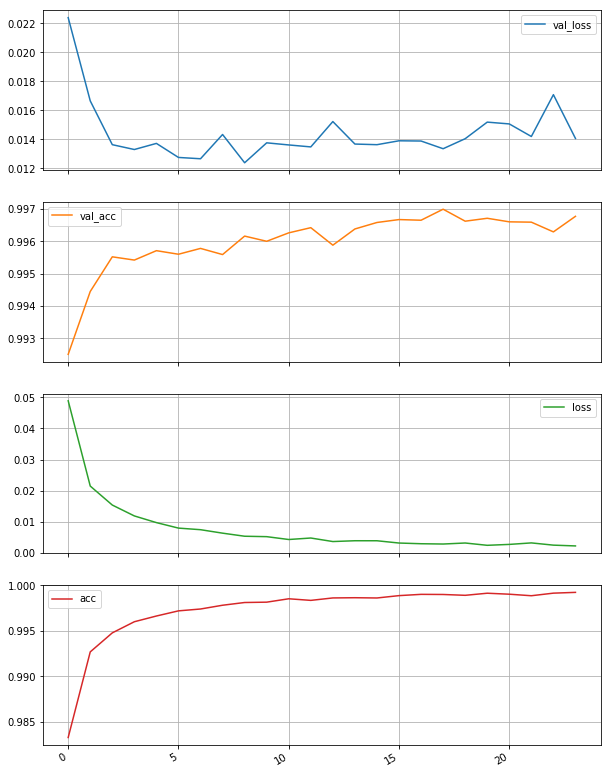

In [11]:
%matplotlib inline

df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [12]:
prediction = model.predict(TestingData)
prediction_classes = prediction.argmax(axis=-1)
score = accuracy_score(TestingTarget, prediction_classes)
print("Accuracy: " + str(score))

Accuracy: 0.9843
